# Machine Learning with K-means Clustering

For this project, we use a real dataset that contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. It also provides the percent of the population living in urban areas.

The goal is to determine which states are the best place to live as indicated by those with the least amount of violent crime in murder and assault.


### Acknowledgements

World Almanac and Book of facts 1975. (Crime rates).

Statistical Abstracts of the United States 1975. (Urban rates).


### Dataset
https://www.kaggle.com/deepakg/usarrests/home

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


# Data
The dataset contains information per 100,000 of Murder, Assault, Urban population, and Rape. But as this is a regression project, we'll deal with the numerical features we have:

Columns 0,3,& 4 are excluded from analysis.

In [5]:
# Import the dataset
dataset = pd.read_csv('USArrests.csv')

In [6]:
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
# Creating X
X = dataset.iloc[:, [1,2]].values

# The Elbow Method and the WCSS

Within Cluster Sum of Squares (WCSS) is used to determine the distances between centroids and each point and squaring it.

The elbow method is used to determine the optimal number of clusters.

3 clusters are recommended.

The selection of the centroids at the beginning of the algorithm can potentially dictate the outcome of the centroids. The K means++ resolves this. Inertia is a function that computes the WCSS.

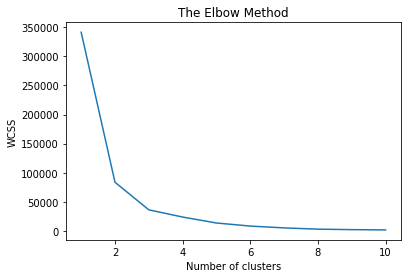

In [10]:
# Using the elbow method 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 202)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 52)
y_kmeans = kmeans.fit_predict(X)


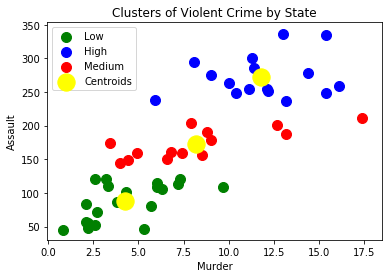

In [33]:
# Visualizing the clusters             
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Low')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Medium')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Violent Crime by State')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()

plt.show()

# Where to Live?

There are three distinct clusters indicated by the algorithm. The safest place to live would be in the green states where murders per 100,000 and assaults are at their lowest. Red has a medium amount of violent crime and blue states have the highest number of murders and assaults.

For those looking at relocating and to whom the number of violent crimes is a concern, the green states and some of the red are recommended. With the blue states being ones to avoid.


# Where to Live?
### Part 2

To examine a specific state we would compare the y_means variable to the dataset. 
<br>0 = Low Crime
<br>1=High Crime
<br>2= Medium Crime
 
Alabama, Alaska, and Arizona have high crime rates according to this model. <br>
Arkansas is item 4 in our y_means array and in group 2 which is "medium" crime.<br>
Connecticut is a 0, "Low" crime.

In [30]:
y_kmeans

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [28]:
dataset.head(7)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
